# Activity 6

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
from simple_colors import *
import pandas as pd
from numpy import asarray

In [2]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
# converting the known3 faces into matrix so that later we can execute SVD on this matrix
matrixdata1 = []
path = 'known3'
images = os.listdir(path)
for i in images:
    x = Image.open(os.path.join(path,i))
    predata = np.asarray(x)
    shape = predata.shape
    data1 = predata.ravel()
    reshapedata = data1.T
    matrixdata1.append(reshapedata)

A = np.array(matrixdata1).T
#print('matrix of m x n images:'  ,A)  # we can check the values of matrix if we need
print('Dimension of m x n matrix'  ,A.shape) # we can check the dimension of the matrix

# calculating the mean face

mean = np.zeros(A.shape[0])
for i in range(0,A.shape[0]):
    mean[i] = (sum(A[i,:]))/A.shape[1]
print()
print(blue('The shape of the mean of dataset',['bold','reverse']))
print(mean.shape)
print()

# normalizing the dataset

B = np.zeros((A.shape[0],A.shape[1]))
for j in range(0,A.shape[1]):
    B[:,j] = A[:,j] - mean
    

#print(green('normalized matrix of m x n images:',['bold','reverse']))
#print(B)
print()
print(green('Dimension of normalized m x n matrix',['bold','reverse']))
print(B.shape)


Dimension of m x n matrix (77760, 90)

The shape of the mean of dataset
(77760,)


Dimension of normalized m x n matrix
(77760, 90)



Printing first 25 images


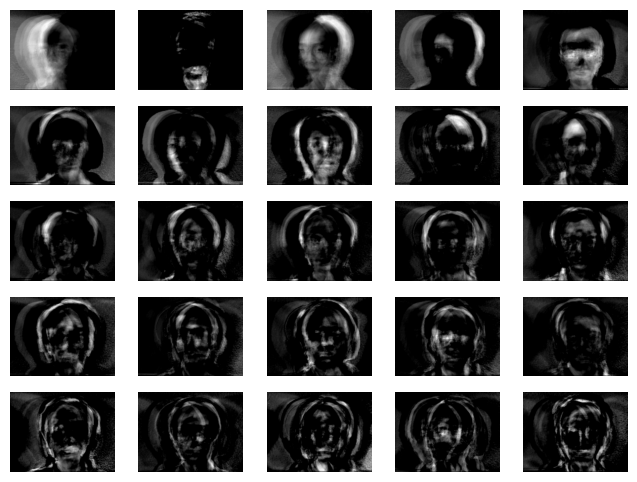

In [4]:
# executing SVD

# calculating A^t.A for matrix V
AtA = B.T.dot(B)
prod = AtA
#print('The dimension of A^t.A is:', prod.shape)
print()

#calculating eigenvalues and eigenvectors
val1, vec1 = np.linalg.eig(prod)

#sorting eigenvalues and their corresponding eigenvectors
idx1 = val1.argsort()[::-1] 
val1 = val1[idx1]
vec1 = vec1[:,idx1]

# matrix V and V^t
V = vec1 # V matrix
Vt = V.T # V^t
#print('V^t matrix=')
#print(Vt)

#calculating singular values

a = B.shape[0]
b = B.shape[1]
Sigma = np.zeros((a,b))

for i in range(0,b): 
    for j in range(0,a):
        if i == j:
            Sigma[i,j] = np.sqrt(val1[i])
        
#print('Sigma matrix=')
#print(np.around(Sigma, decimals = 3))

# calculating U matrix
U = np.zeros((a,a))
for i in range(0,b):
    U[:,i] = B.dot(V[:,i])/np.sqrt(val1[i])
    
#print('U matrix=')
#print(U)

# selecting base faces

baseface = U[:,0:b]

# scaling back the baseface in order to generate image
scaledbaseface = np.zeros((a,b))
for i in range(0,90):
    scaledbaseface[:,i] = baseface[:,i]*255/np.amax(baseface[:,i])
    
# printing the base faces
img_data = []
for i in range(0,90): 
    imgdata = np.asarray(scaledbaseface[:,i]).reshape(243,320)
    #print(magenta('The shape of the data for image',['bold']))
    #print(imgdata.shape)
    image = Image.fromarray(imgdata)
    img_data.append(image)
   
print(blue('Printing first 25 images',['bold', 'reverse']))
img_data1 = img_data[0:25]   
plt.figure(figsize=(8,6))
for i in range(len(img_data1)):
    plt.style.use('default')
    plt.subplot(5,5,i+1)
    plt.imshow(img_data1[i],cmap='Greys_r')
    #plt.savefig('q6.png')
    plt.axis('off')

